In [2]:
from numpy import (
    ndarray, max
)
from cv2 import (
    imread, imshow, waitKey, destroyAllWindows, 
    cvtColor, COLOR_BGR2GRAY, calcHist, GaussianBlur
)
from matplotlib.pyplot import (
    plot, title, xlabel, ylabel, show,
    subplot, axis, tight_layout, subplots
)

In [3]:
def display_histogram(img : ndarray) -> None: 
    
    histogram = calcHist([img], [0], None, [256], [0, 256])
    
    _, axs = subplots(1, 2, figsize=(10, 5))

    # Display the image in the first subplot
    axs[0].imshow(img / max(img), cmap='gray', vmin=0, vmax=1)
    axs[0].set_title('Image')
    axs[0].axis('off')

    # Display the histogram in the second subplot
    axs[1].plot(histogram)
    axs[1].set_title('Image Histogram')
    axs[1].set_xlabel('Pixel Value')
    axs[1].set_ylabel('Frequency')

    tight_layout()

In [32]:
from cv2 import (
    threshold, THRESH_BINARY, THRESH_OTSU, findContours, 
    RETR_EXTERNAL, CHAIN_APPROX_SIMPLE, drawContours, FILLED, bitwise_and
)

from numpy import zeros_like

def segmentation_threshold(img : ndarray) -> ndarray:

    _, thresh = threshold(img, 0, 255, THRESH_BINARY + THRESH_OTSU)
    
    # Find contours
    contours, _ = findContours(thresh, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE)

    # Create a mask for the segmented objects
    segmented_mask = zeros_like(img)
    
    # Draw contours on the mask
    drawContours(segmented_mask, contours, -1, (255), thickness=FILLED)
    
    # Bitwise AND operation to extract segmented objects
    segmented_image = bitwise_and(img, img, mask=segmented_mask)

    return segmented_image

In [14]:
example_image_path = "..\\..\\foto\\image_20_0x_00175_22_6.png"

def read_image(path=example_image_path):
    img = imread(path)
    img = cvtColor(img, COLOR_BGR2GRAY)
    return img

img = read_image()

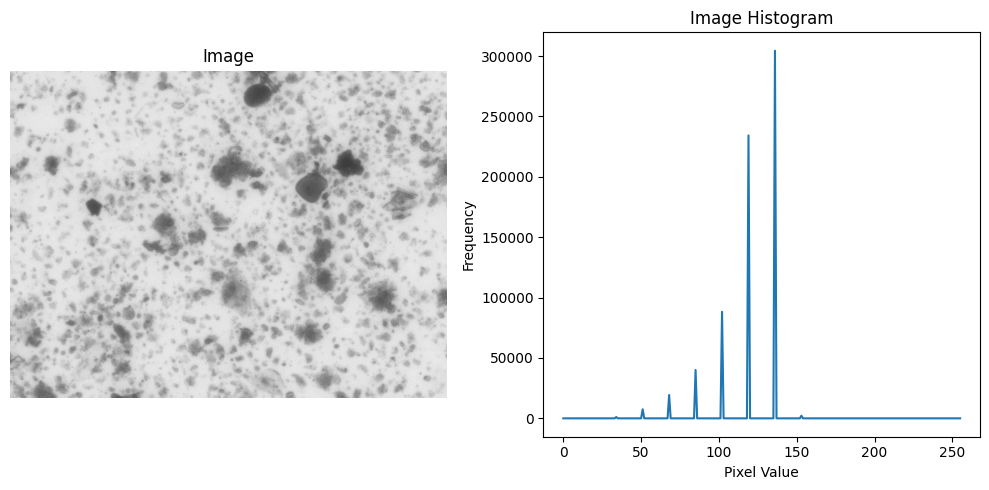

In [15]:
img = read_image()
display_histogram(img)
show()

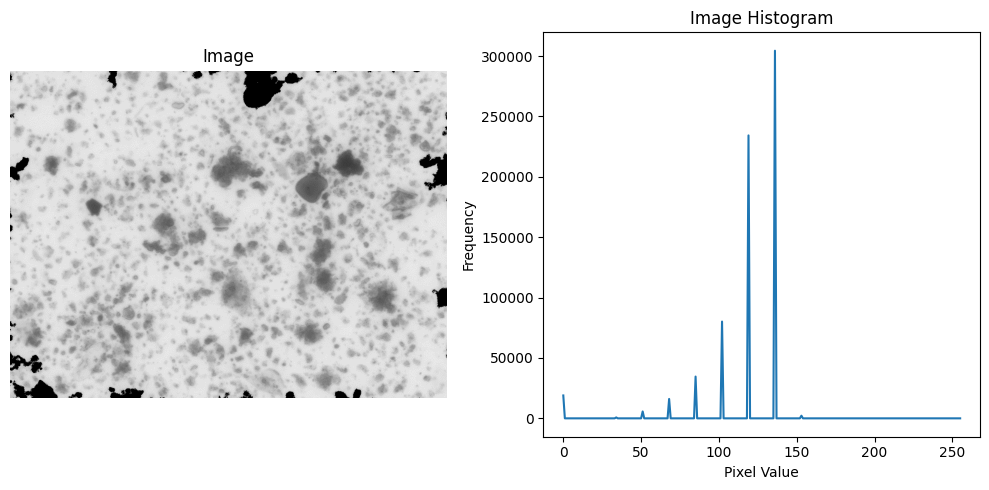

In [37]:
img = read_image()
img = segmentation_threshold(img)
display_histogram(img)
show()

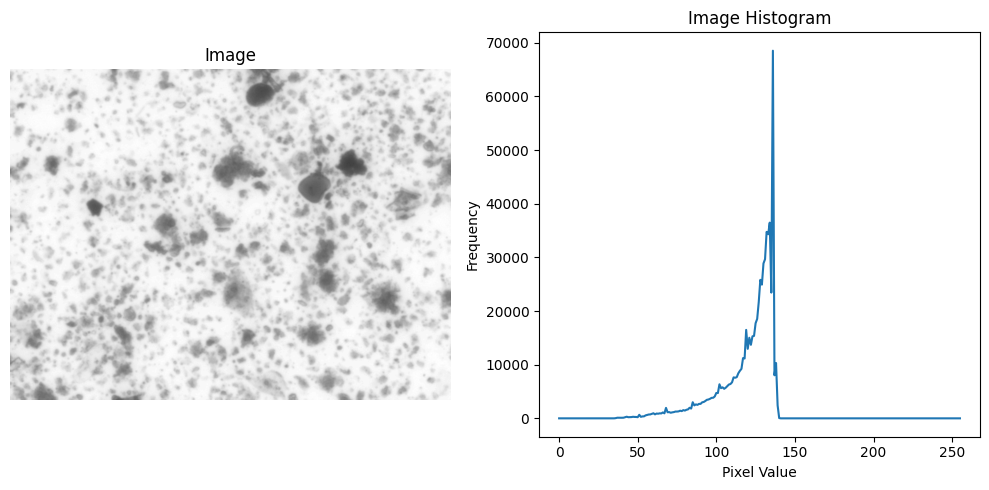

In [16]:
img = read_image()
img = GaussianBlur(img, (5, 5), 0)
display_histogram(img)
show()

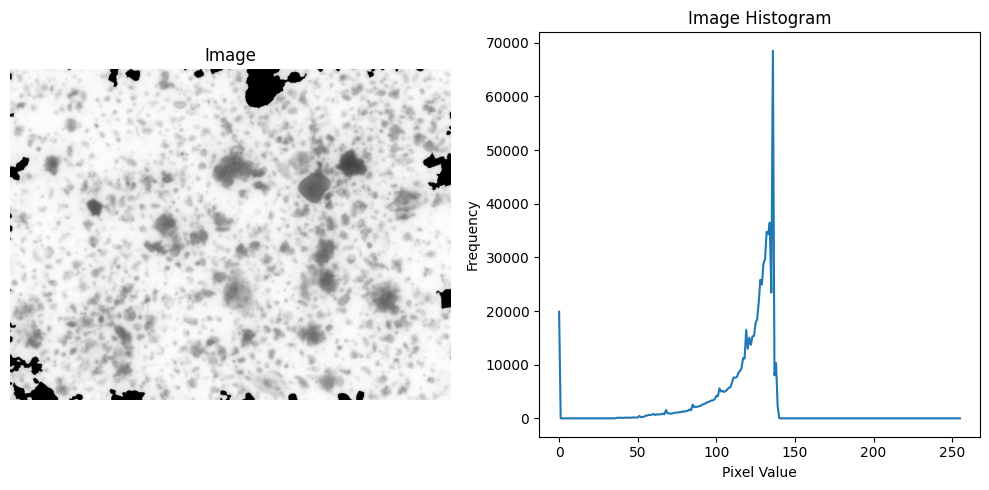

In [38]:
img = read_image()
img = GaussianBlur(img, (5, 5), 0)
img = segmentation_threshold(img)
display_histogram(img)
show()